In [17]:
## Import packages
import pandas as pd
import json
import requests


## Stock info. function
def getStockInfo(ticker, apiKey):
    url = f'https://yfapi.net/v11/finance/quoteSummary/{ticker}'
    headers = {'x-api-key': apiKey}
    queryParameters = {"modules": "price,summaryDetail,financialData"}

    response = requests.get(url, headers=headers, params=queryParameters)

    if response.status_code == 200:
        data = response.json()
        if 'quoteSummary' in data and 'result' in data['quoteSummary']:
            stockInfo = data['quoteSummary']['result'][0]
            return stockInfo
        else:
            raise Exception("No data found for the ticker symbol.")
    else:
        print("Response Content:", response.text)
        raise Exception(f"Error fetching data for {ticker}: {response.status_code}")

## Trending stock info. function
def getTrendingStocks(apiKey):
    url = 'https://yfapi.net/v1/finance/trending/US'
    headers = {'x-api-key': apiKey}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        return [stock['symbol'] for stock in data['finance']['result'][0]['quotes'][:5]]
    else:
        print("Response Content:", response.text)
        raise Exception(f"Error fetching trending stocks: {response.status_code}")


## Main function
def main():
    apiKey = "xyz"
    ticker = input("Enter the stock ticker symbol: ").upper()

    try:
        stockInfo = getStockInfo(ticker, apiKey)
        priceInfo = stockInfo['price']
        summaryDetail = stockInfo['summaryDetail']
        financialData = stockInfo['financialData']

        stockData = {
            'Ticker Name': priceInfo['symbol'],
            'Full Name': priceInfo.get('longName', 'N/A'),
            'Current Market Price': priceInfo.get('regularMarketPrice', {}).get('raw', 'N/A'),
            'Target Mean Price': financialData.get('targetMeanPrice', {}).get('raw', 'N/A'),
            '52 Week High': summaryDetail.get('fiftyTwoWeekHigh', {}).get('raw', 'N/A'),
            '52 Week Low': summaryDetail.get('fiftyTwoWeekLow', {}).get('raw', 'N/A')
        }

        print("\nStock Information:")
        for key, value in stockData.items():
            print(f"{key}: {value}")

        trendingStocks = getTrendingStocks(apiKey)

        print("\nTrending Stocks:")
        for stock in trendingStocks:
            print(stock)

        df = pd.DataFrame([stockData])
        df['Trending Stocks'] = ', '.join(trendingStocks)

        df.to_csv('api_hw_stock_info.csv', index=False)
        print("\nStock information saved to 'api_hw_stock_info.csv'.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Run the program
if __name__ == "__main__":
    main()



Enter the stock ticker symbol:  tsla



Stock Information:
Ticker Name: TSLA
Full Name: Tesla, Inc.
Current Market Price: 260.46
Target Mean Price: 210.71
52 Week High: 271.0
52 Week Low: 138.8

Trending Stocks:
AMSC
PWR
SNAP
VRT
SOL-USD

Stock information saved to 'api_hw_stock_info.csv'.


Enter the stock ticker symbol:  tsla


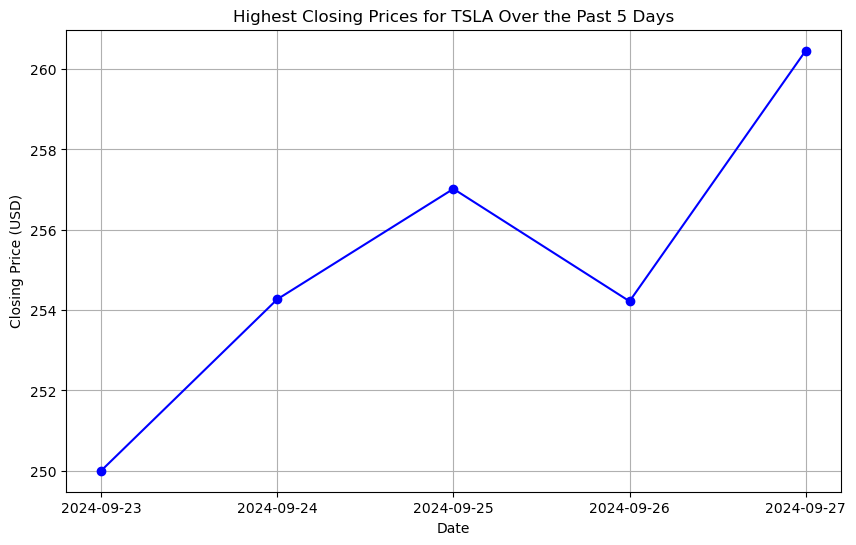

In [19]:
## Bonus
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def getHistoricalData(ticker):
    url = f'https://yfapi.net/v8/finance/spark?interval=1d&range=5d&symbols={ticker}'
    headers = {
        'x-api-key': 'xyz'
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        if ticker in data and 'close' in data[ticker]:
            return data[ticker]
        else:
            raise Exception("No historical data found for the ticker symbol.")
    else:
        raise Exception(f"Error fetching historical data for {ticker}: {response.status_code}")

def plotHighestPrices(ticker):
    try:
        historicalData = getHistoricalData(ticker)
        
        closePrices = historicalData['close']
        timeStamps = historicalData['timestamp']

        dates = [datetime.fromtimestamp(ts).strftime('%Y-%m-%d') for ts in timeStamps]

        plt.figure(figsize=(10, 6))
        plt.plot(dates, closePrices, marker='o', linestyle='-', color='b')
        plt.title(f"Highest Closing Prices for {ticker} Over the Past 5 Days")
        plt.xlabel("Date")
        plt.ylabel("Closing Price (USD)")
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

## Example
ticker = input("Enter the stock ticker symbol: ").upper()
plotHighestPrices(ticker)
